## Import Dependencies

In [1]:
import torch
from gans import Generator, Discriminator, DCGenerator, DCDiscriminator,initialize_weights
from utils import train_fcgan,train_dcgan
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"


# fcGAN on MNIST Data

## Data Analysis

In [2]:
# GANs are sensitive to Hyperparams
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4  # best lr for Adam given by andrew karpathy: 3e-4
z_dimension = 128 #64,128,256
image_dim = 28*28*1
batch_size = 32
num_epochs = 100
print(device,torch.cuda.get_device_name(0))

cuda NVIDIA RTX A4000


In [3]:
# Dataset and loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])
dataset = datasets.MNIST(root='./data/', transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

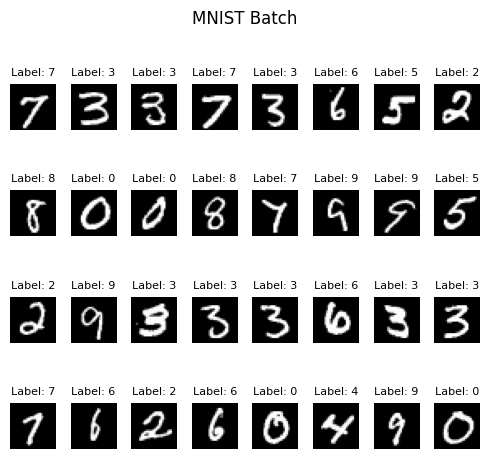

In [4]:
# fetch the first batch
data_iter = iter(loader)
images, labels = next(data_iter)

# undo normalization 
images = images * 0.5 + 0.5  # Convert back to [0, 1] range

# plot the images in a square-like grid
fig, axes = plt.subplots(4, 8, figsize=(5,5))
axes = axes.flatten()  # flatten to easily iterate

# display each image with label
for i in range(32):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}", fontsize=8)
    axes[i].axis("off")

# # hide any unused subplots
# for i in range(loader.batch_size, grid_size * grid_size):
#     fig.delaxes(axes[i])

plt.suptitle('MNIST Batch')
plt.tight_layout()
plt.show()

In [5]:
print(f'Image Dimension: {dataset[0][0].shape}')

Image Dimension: torch.Size([1, 28, 28])


In [6]:
torch.cuda.empty_cache()

## Model

In [7]:
# Model initialization
discriminator = Discriminator(image_dimension=image_dim).to(device)
generator = Generator(z_dimension=z_dimension, image_dimension=image_dim).to(device)

Epoch [0/100] Batch 1874/1874 Loss D: 0.2286, loss G: 3.7131
Epoch [1/100] Batch 1874/1874 Loss D: 0.1150, loss G: 3.3906
Epoch [2/100] Batch 1874/1874 Loss D: 0.2631, loss G: 2.7429
Epoch [3/100] Batch 1874/1874 Loss D: 0.4334, loss G: 2.0211
Epoch [4/100] Batch 1874/1874 Loss D: 0.3895, loss G: 1.8196
Epoch [5/100] Batch 1874/1874 Loss D: 0.2111, loss G: 2.2686
Epoch [6/100] Batch 1874/1874 Loss D: 0.5578, loss G: 1.7794
Epoch [7/100] Batch 1874/1874 Loss D: 0.4264, loss G: 1.6543
Epoch [8/100] Batch 1874/1874 Loss D: 0.4124, loss G: 1.3760
Epoch [9/100] Batch 1874/1874 Loss D: 0.4274, loss G: 1.4632
Epoch [10/100] Batch 1874/1874 Loss D: 0.3793, loss G: 1.2152
Epoch [11/100] Batch 1874/1874 Loss D: 0.3748, loss G: 1.3195
Epoch [12/100] Batch 1874/1874 Loss D: 0.4896, loss G: 1.2254
Epoch [13/100] Batch 1874/1874 Loss D: 0.5323, loss G: 1.4220
Epoch [14/100] Batch 1874/1874 Loss D: 0.6313, loss G: 0.9681
Epoch [15/100] Batch 1874/1874 Loss D: 0.5014, loss G: 1.4786
Epoch [16/100] Bat

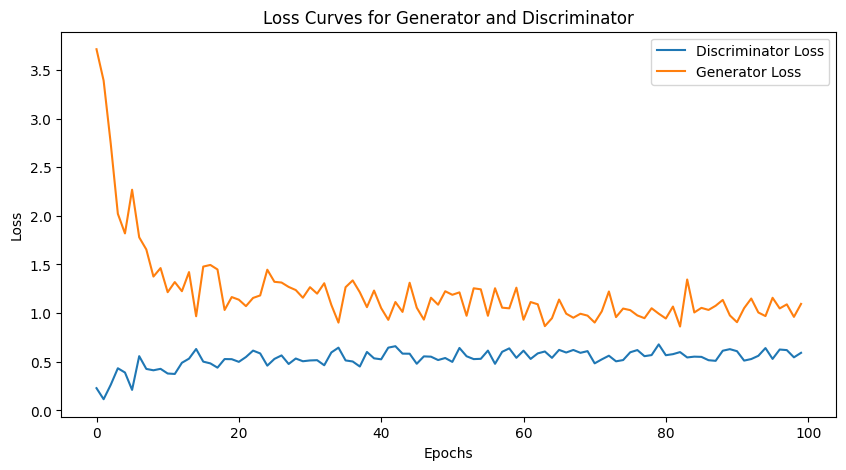

In [8]:
# Training
train_fcgan(generator, discriminator, loader, device, num_epochs, z_dimension, lr)

# dcGAN on CIFAR 10

In [9]:
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr_gen = 2e-4
lr_disc = 1e-4
z_dimension = 64 # 64
channels_img = 3  # CIFAR10 images are RGB
batch_size = 128 # 128
num_epochs = 100
features_d=128
features_g=64
image_size = 32 # 32


transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])
dataset = datasets.CIFAR10(root='./data/', transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

Files already downloaded and verified


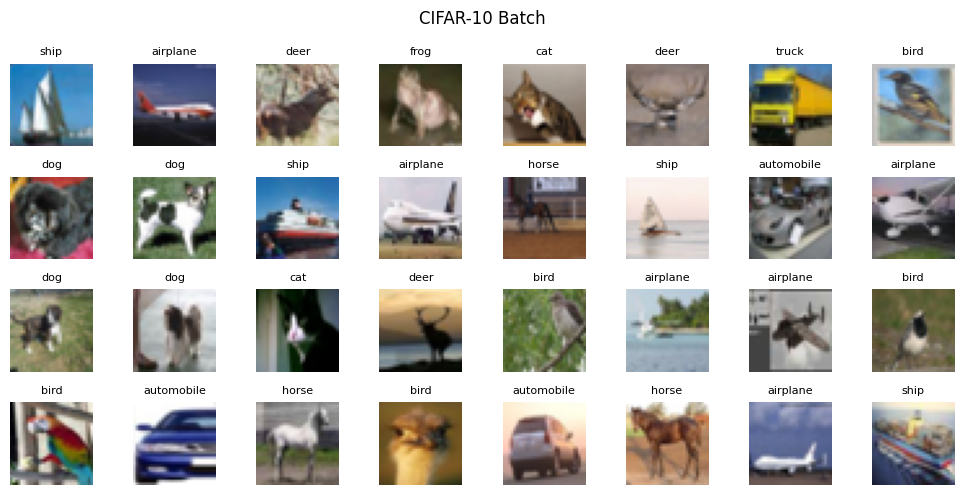

In [10]:
# CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                   'dog', 'frog', 'horse', 'ship', 'truck']

# Fetch the first batch
data_iter = iter(loader)
images, labels = next(data_iter)

# Undo normalization 
images = images * 0.5 + 0.5  # Convert back to [0, 1] range

# Plot the images in a 4x8 grid
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
axes = axes.flatten()  # Flatten to easily iterate

for i in range(32):
    axes[i].imshow(np.transpose(images[i].numpy(), (1, 2, 0)))
    axes[i].set_title(f"{cifar10_classes[labels[i].item()]}", fontsize=8)
    axes[i].axis("off")

# Hide any unused subplots
for i in range(32, len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('CIFAR-10 Batch')
plt.tight_layout()
plt.show()


In [11]:
images.shape

torch.Size([128, 3, 32, 32])

Epoch [0/100] Batch 390/390 Loss D: 0.1798, Loss G: 4.6128
Epoch [1/100] Batch 390/390 Loss D: 0.3305, Loss G: 2.4691
Epoch [2/100] Batch 390/390 Loss D: 0.2642, Loss G: 3.1437
Epoch [3/100] Batch 390/390 Loss D: 1.5913, Loss G: 3.9863
Epoch [4/100] Batch 390/390 Loss D: 0.3073, Loss G: 4.0434
Epoch [5/100] Batch 390/390 Loss D: 0.5214, Loss G: 4.8478
Epoch [6/100] Batch 390/390 Loss D: 0.3027, Loss G: 3.1730
Epoch [7/100] Batch 390/390 Loss D: 0.2967, Loss G: 2.7353
Epoch [8/100] Batch 390/390 Loss D: 0.2735, Loss G: 3.3047
Epoch [9/100] Batch 390/390 Loss D: 0.2806, Loss G: 3.6030
Epoch [10/100] Batch 390/390 Loss D: 0.4853, Loss G: 1.4799
Epoch [11/100] Batch 390/390 Loss D: 0.4272, Loss G: 2.2638
Epoch [12/100] Batch 390/390 Loss D: 0.4753, Loss G: 4.9633
Epoch [13/100] Batch 390/390 Loss D: 0.3215, Loss G: 2.7547
Epoch [14/100] Batch 390/390 Loss D: 0.2445, Loss G: 3.6119
Epoch [15/100] Batch 390/390 Loss D: 0.2939, Loss G: 2.5698
Epoch [16/100] Batch 390/390 Loss D: 0.3409, Loss 

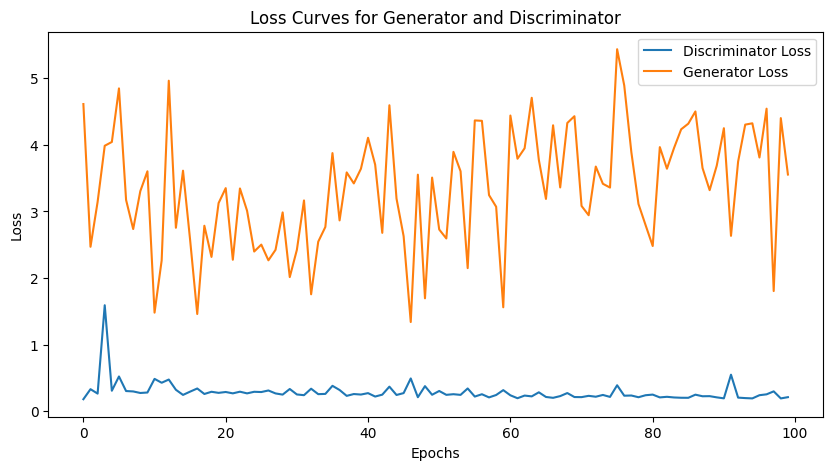

In [12]:
# Initialize DCGAN Models
discriminator = DCDiscriminator(img_channels=channels_img, features_d=features_d).to(device)
generator = DCGenerator(z_dimension=z_dimension, img_channels=channels_img, features_g=features_g).to(device)

# Initialize weights
initialize_weights(discriminator)
initialize_weights(generator)

# Training
train_dcgan(generator, discriminator, loader, device, num_epochs, z_dimension, lr_gen,lr_disc)